# Reinforcement Learning Approach to solve Travelling Salesman Problem 

# 1. Introduction

First let us understand the problem that we are trying to solve that is the travelling salesman problem. 

## 1.1 Travelling Salesman Problem. 

**Problem Set up :** There is a list of cities given and their pair wise distances. 

**Problem Objective:** To find the shortest possible route that visits each city exactly once and return to the original city. 

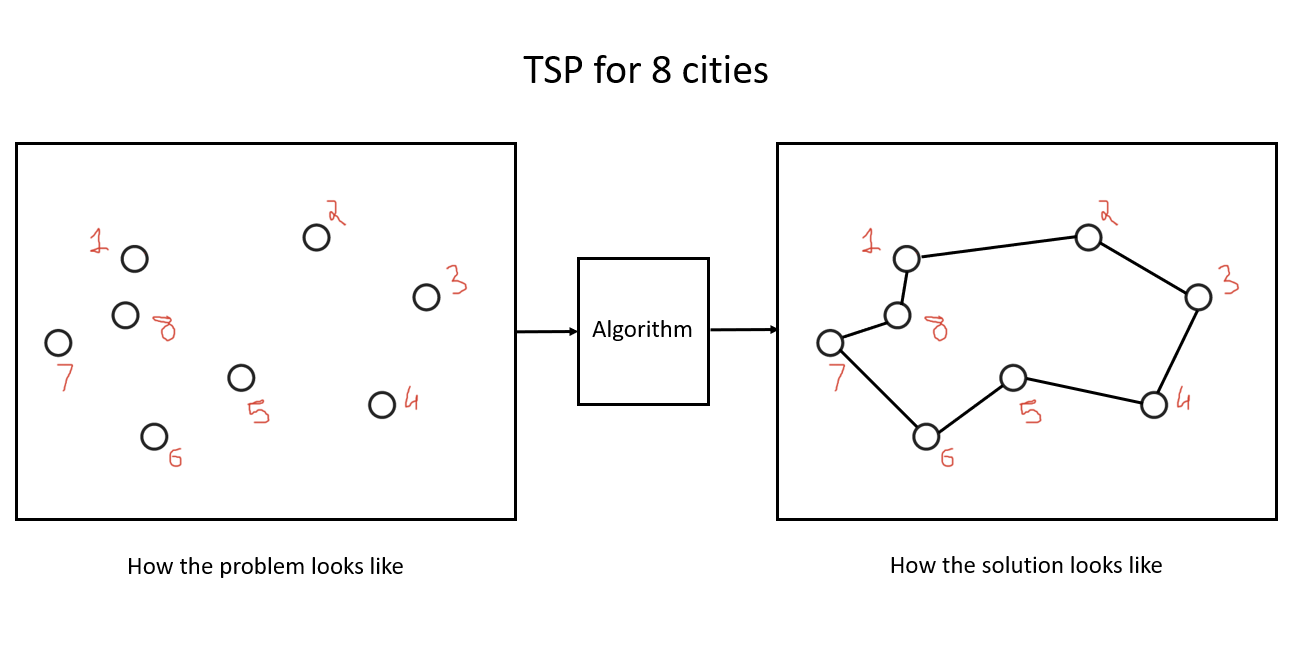



**OPTIMAL PATH : 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8 -> 1**

**Motivation :** With the increase in popularity of e-commerce, it is becoming of utmost importance for the logistics industry to optimize their deliveries inorder to minimize the cost. This is an application of TSP. TSP also works as a benchmark for the other complex problems like the Vehicle Routing Problem (VRP), the Marine Routing Problem (MRP) and the Warehouse Placement Problem. Thus, on a business front solving TSP optimally can make a difference to the organization. 

**Challenges :** The problem is categorized as a NP-Hard problem (nondeterministic polynomial time - hard). The worst case scenario for the problem is of the order O(n!) where n is the number of cities to be traversed, thus it becomes very difficult to do the brute force approach for even 20 cities as 20! is in the order of $10^{18}$. Thus we need to develop algorithms which would solve the TSP optimally and in reasonable time. It was evident that the simplest approach of trying every possible combination is not possible and thus ever since the problem has been formulated there have been numerous algorithms that intend to solve the TSP, but all of them involve math heuristics. 

**Innovation :** This project aims at taking the data-driven approach which will figure out what should be the optimal path to solve the problem. The input to the data will be a position of the cities and the output will be the optimal path to be traversed. This can be done by implementing a Reinforcement Learning which is a subset of Machine Learning. The further sections describe what reinforcement learning is and how is it implemented to solve the TSP. 

### 1.2.1 What is Reinforcement Learning ?

Reinforcement learning is an area of machine learning concerned with how intelligent agents ought to take actions in an environment in order to maximize the notion of cumulative reward [wikipedia]. 

The major assumption with the Reinforcement Learning is that it is a Markovian Process which means that the next state is only dependent on the current state and is independent of all the past states. This helps us in formulating the Bellman equation (explained later) which helps us get the value at reach state. 

The essence of Reinforcement learning is that there world/enviornment and there is an agent. The agent acts in the environment and gets some rewards. The ultimate goal of the agent is to accumulate maximum cummulative reward at the end of the process. 

It is as analogous to raising a child. The child interacts with the world and performs some actions which are completely random and is given reward by the parents as per the action performed by the child (PS: The reward can be positive or negative), and the ultimate goal of the child is to maximize the rewards given by the parents as the child does not inherentaly want to have negative rewards. So is the case with the agent that we design the agent such that it tries to maximize the rewards.

For explaining further the components of RL, we shall use TSP as an example.

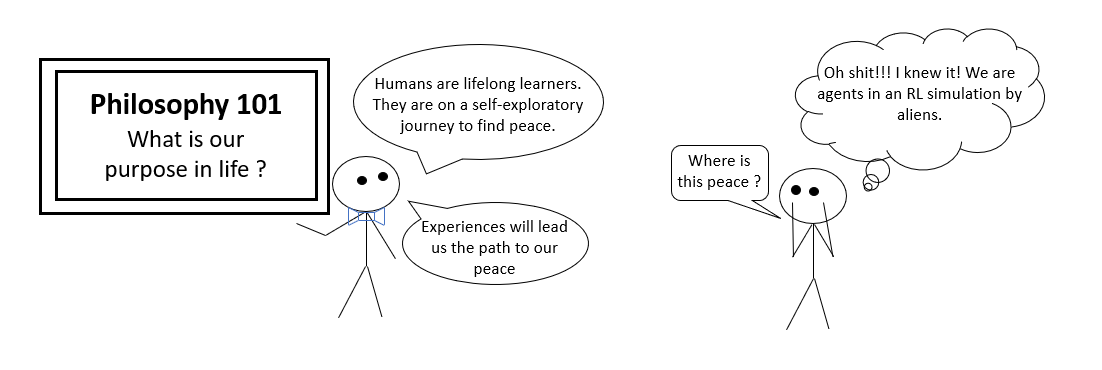

### 1.2.2 Components of Reinfocement Learning 

1. Set of States : The Set of States means that what all states can one go to from a previous state. Persay we have a 3 city TSP, then the possible states would be 1->2, 1->3, 2->1, 2->3, 3->1, 3->2. This will be called possible states. 


2. Set of Actions : The Set of Actions means what actions can I take in the when you are in a particular state. Lets continue the TSP mentioned above where I start from 1. I have the following actions available at the state 1, those are either move to city 2 or 3. Thus my action set is {2,3}.


3. State Transition Probability (Probability state Function) : State Transition Probability means that I give a command to go to city 2 but the agent moves to city 3 or it doesnt move at all with certain probabilites, then I have to take into account that what is the probability that my agent moves to the city I command it to go. For my problem below, I consider the STP to be 1. 


4. Gamma (Discount factor) 0<Gamma<1 : Gamma is the discount factor which tells me how important are the future decisions wrt the decisions that I am taking now. This is similar to the discount factor in the cash flow systems where if you have 100 usd given to you every year for the period of 5 years, at the end of the 5 years we expect to have 500 usd but the purchasing power with those 500 usd then will be equal to the purchasing power of 460 usd now. Thus, to find out how much the future rewards will get me now, we use the concept of discount factor. 


5. Reward funciton : Reward Function is assigning rewards to a particular action that the agent makes. If the action is favourable, we give it a positive reward, if the action is not favourable, we give it a negative reward, the agent tries to maximize the rewards that it can achieve.

### 1.2.3 How the agent learns ?

**Policy** : Policy is the mapping of the states to a particular action. In other words, policy can be termed as the decision that the agent needs to make in a particular state to maximize its reward when the model is trained. 

The Agent interacts with the world in a particular state from the set of states and performs a random action from the set of actions, this action results in the agent getting some reward, which influences the policy at the given state and the agent moves on to the next state which is the result of the particular action that it performed at the given state. 

Now the question comes how does it even learn, as it is just taking a random action every time. The answer to this is the concept of exploration vs exploitation. 

**Exploration** : As the word says, the agent explores the world and does random actions and moves to different states generating policy. 

**Exploitation** : Again as the word says, the agent tries to exploit the previously explored path which gives it the maximum reward, that means agent takes the action that results in maximum reward at that state rather than taking a random action.

So intitialy when we begin training the loop, we have the exploration value to be 1 and then we decay the exploration value, so that the model starts to exploit and starts to learn. The exploration rate is denoted by epsilon in my code. 

**Q -Learning**
In Q-learning method, we find out the expectation value of each state. Here, the value is called the Q-value and is obtained as a sum of the reward earned at the current state plus the expectation of all the states that the agent can go from that particular state times the gamma factor. This is represented mathematically as 

Q(s,a) = R(s,a) + $\gamma \Sigma$ Q(s,a')

This is also called the Bellman equation.

The basis of Q-learning is that we do number of experiments (in this case simulate the scenarios that the agent can go to on a random basis) and keep filling in the Q-values corresponding to the states and the actions and populate the sets of Q-values. The Q-values are stored in a 2-D array, and the values are stored as they are stored in the dynamic programming problem. Hence when the model is learned, it just references the maximum value from the Q-table and implements the actions based on it. This approach is great for a smaller set as the agent randomly takes actions and chooses the path hence forward but it can make a mistake at say the second last step and the entire episode fails to converge at a global optima.

## 2. Narration for the implementation of RL 

This are narrative code block which should not be ran, the code presented in section 3 shall be ran to see how it performs. 

We start with importing the libraries 

**numpy** is used for the arithmatics and ease of mathematics

**random** is used to generate the random set of points that would be the cities under consideration.

**copy** is used to save the Q-table so that it does not get overridden in the next iterations.

**cdist** is used to get the euclidian distance between two cities. The reason this library is used is that it directly outputs the distance matrix instead of a user defined function which would do the same but element wise. Another reason to use it is that it is faster than the code that I wrote intially.

**tqdm** it is used to let us know the current epoch the training loop is executing. This is for helping us understand the training time left and the number of iterations being done per second.  

**matplotlib.pyplot** is used for plotting purposes.

**imageio** is used  to make an mp4 file from the saved plots of the path and agent progress. 

In [1]:
import numpy as np
import random
import copy
from scipy.spatial.distance import cdist
from tqdm import tqdm
import matplotlib.pyplot as plt
import imageio

Now as we saw that RL needs an environment, so we start by defining a class Field_states which will be the environment for the TSP. We aslo provide the environment with the following inputs

1. size - The number of cities in the TSP

2. start_position - The starting position. (Here for simplicity we always take the first randomly generated city as our starting position

3. prev_city - The last city that was visited.

4. locations - The co-ordinates of the cities in the TSP.

5. distances - Matrix containing pairwise distance of cities. (output of cdist)

6. visited - An array which will contain the cities to be visited.

And we make a class constructor as we see below.

In [ ]:
### This is the environment that the agent would interact with. 
class Field_states:
    
    ### Class contructor. 
    def __init__(self,size,start_position,prev_city,locations,distances,visited):
        self.size=size ### Number of cities
        self.start_position=start_position ### Starting position for TSP
        self.prev_city=self.start_position ### The previous city visited
        self.locations=locations ### The co-ordinates of the cities
        self.distances=distances ### The distance matrix which has the co-ordinated of the cities. 
        self.visited=visited ### This is the log of the cities that are not visited.

Now we shall discuss the attributes of the class Field_states

We start with the attribute **update**

Update attribute as the name suggests updates the visited log. It takes the argument of action (which is a number between total number of cities to be visited and 0) and then we pop that city from the visited log. This reduces the action space which gives the agent a confined space to work with. The other way around this would be to penalize the agent for visited a city which it has already visited. But it would require more training time. Thus, we do this strategy reducing the action_space for the agent. 

The return statements here would be to indicate if only one city is left to be visited then return true else return false.

In [ ]:
    ### The update function updates the visited log by poping the city that the agent is currently on. 
    def update(self,action):
        if len(self.visited)!=1:
            self.visited.pop(action)
            return False
        else:
            return True

**make_action** attribute takes the argument of action and then gives agent the reward of negative of distance between previous city and the city that it will visit. The city to be visited is given by city that is at index action in the visited log. It also updates the previous city to the city it has visited. 

In [ ]:
    ### Function returns the reward of the current city visted from the previous to the agent while updating the previous city. 
    def make_action(self,action):
        reward=-self.distances[self.prev_city][self.visited[action]]
        self.prev_city=self.visited[action]
        return reward

**get_action** attribute will give the city that it needs to visit. Which is given by the city at the index (action) in the visited log.

In [ ]:
    ### This function tells which city is being visited. 
    def get_action(self,action):
        return self.visited[action]

**reset** attribute resets the visited log and makes all the cities available to visit except for the starting city which in our case is always 0th city.

In [ ]:
    ### Reset makes the visited log reset to its full capacity. 
    def reset(self):
        self.visited=[i for i in range(1,self.size)]

**get_number_of_states** attribute gives the possible states that the agent can be in. For this problem it is going to be a 2D matrix of shape size*size. This is because it can go from each city to any other city.

In [ ]:
    ### This returns the number of states that the problem can have. 
    def get_number_of_states(self):
        return self.size*self.size

**get_state** attribute gives us the current city that the agent is in.

In [ ]:
    ### This returns which is the current city the agent is in. 
    def get_state(self):
        state = self.prev_city
        return state

**current_city** attribute takes in the argument of action and returns the city that the agent will be visiting.

In [ ]:
    ### This returns the current city that is being visited. 
    def current_city(self,action):
        return self.visited[action]

**final_trip** attribute makes the path complete by connecting the last city being visited to the starting city.

In [ ]:
    ### This makes the trip complete by rewarding the last city being visited to the starting point. 
    def final_trip(self,visited):
        return -self.distances[self.visited[0]][self.start_position]

The entire code for the class of Field_states is in the cell below. 

In [2]:
### This is the environment that the agent would interact with. 
class Field_states:
    
    ### Class contructor. 
    def __init__(self,size,start_position,prev_city,locations,distances,visited):
        self.size=size ### Number of cities
        self.start_position=start_position ### Starting position for TSP
        self.prev_city=self.start_position ### The previous city visited
        self.locations=locations ### The co-ordinates of the cities
        self.distances=distances ### The distance matrix which has the co-ordinated of the cities. 
        self.visited=visited ### This is the log of the cities that are not visited. 

    ### The update function updates the visited log by poping the city that the agent is currently on. 
    def update(self,action):
        if len(self.visited)!=1:
            self.visited.pop(action)
            return False
        else:
            return True

    ### This function forces the agent to go from the last city visited to the starting city and returns the rewards of distance between
    ### the starting city to the previous city. 
#     def loop_complete(self,action):
#         reward=-self.distances[self.prev_city][self.start_position]
#         return reward

    ### Function returns the reward of the current city visted from the previous to the agent while updating the previous city. 
    def make_action(self,action):
        reward=-self.distances[self.prev_city][self.visited[action]]
        self.prev_city=self.visited[action]
        return reward
    
    ### This function tells which city is being visited. 
    def get_action(self,action):
        return self.visited[action]
    
    ### Reset makes the visited log reset to its full capacity. 
    def reset(self):
        self.visited=[i for i in range(1,self.size)]

    ### This returns the number of states that the problem can have. 
    def get_number_of_states(self):
        return self.size*self.size

    ### This returns which is the previous city to the agent (number of action*number of cities). 
    def get_state(self):
        state = self.prev_city
        return state

    ### This returns the current city that is being visited. 
    def current_city(self,action):
        return self.visited[action]

    ### This makes the trip complete by rewarding the last city being visited to the starting point. 
    def final_trip(self,visited):
        return -self.distances[self.visited[0]][self.start_position]

Now our class Field_states is ready and we need to pass the parameters so that we have a environment as per the given cities. 

Thus we write the arguments that the class would take in the cell below.

We start with the number of cities in the TSP.

In [ ]:
size=8 ### Number of cities in the TSP

Next we move on to generating cities randomly. This can be done by using the np.random.rand(size,2) command, but one flaw with the Q-learning is that it is very sensitive to the hyperparameters and thus, upon changing the set up of the cities we have to change the hyper parameters. Thus to keep things simply, I got randomly generated city co-ordinates which suits the hyperparameters. I arrived at this set of cities via trail and error. But the beauty of RL is that we can solve TSP for any set of cities as far as the hyperparameters are appropriately choosen. This can be done via **hyperopt** library.

So we stick with the following set of city locations and to run it for different size of TSPs one can just copy the location of the cities under the respective size to work for the hyperparameters given below.

(I shall explain hyperparameters in the subsequent explainations)

City co-ordinates.

Size = 5

p=[[44.9099297 , 71.60198543],
 [99.6797983 , 97.75357024],
 [94.89921275 ,81.95573837],
 [87.96256798 ,52.08882539],
 [60.75790857 ,70.30094274]]

Size = 8 

p=[[29.18398547, 39.11321842],
 [25.53584877, 83.59069482],
[52.6727154 , 39.94974504],
[76.3494153 , 71.00058505],
[99.91002399, 70.35932207],
[52.01995294 ,11.92306692],
[45.60271258 , 2.70580149],
[ 5.01802982 ,35.5641515]]

size=10

p=[[45.48965134, 65.84756108],
[70.2055523 , 89.02859327],
[96.96846514,  7.38527303],
[66.77938417, 12.5508675 ],
[75.19659164, 37.13545284],
[32.88640287,  7.92377867],
[ 8.27123283, 35.67744457],
[20.12852   , 80.93716743],
[37.00990546, 96.84224497],
[22.78619587, 14.13997714]]

Size = 12

p=[[85.09075165,  6.21524607],
[74.76018376, 10.1517191 ],
[46.52036972, 16.06151535],
[92.89370863, 19.04608841],
[92.19586991, 16.32482861],
[70.82967811, 34.22976003],
[96.50522388, 44.89770487],
[76.97332995, 55.57635978],
[83.95870587, 86.79955858],
[81.93288277, 97.74594552],
[51.51014041, 99.83739524],
[49.31326904,  1.82068674]]

In [ ]:
p= np.random.rand(size,2)*100
### This are the values that are randomly generated by the command above and the model is hyperparameter tuned for this particular 
### set of co-ordinates. 

### Co-ordinated of the cities in the grid that we shall use. 
p=[[29.18398547, 39.11321842],
 [25.53584877, 83.59069482],
 [52.6727154 , 39.94974504],
 [76.3494153 , 71.00058505],
 [99.91002399, 70.35932207],
 [52.01995294 ,11.92306692],
 [45.60271258 , 2.70580149],
 [ 5.01802982 ,35.56415151]]

Once we have the cities we use the cdist library to get the distance matrix where each cell would represent the eucledian distance between the two indices, so value at (1,2) will represent distance between the second city and the third city (This is 0-based indexing).

In [ ]:
### q stores the distance between each city in the grid.
q= cdist(p,p)

We intialize the TSP from the 0th city, thus we make the start_position argument equal to 0, but we can also randomly generate the starting position for the TSP.

In [ ]:
### Initial position, for the problem to be simple we always start from 0.
start_position=0

Now we make all cities available to be visited and thus initiate the visited log as all the other cities except for the first city.

In [ ]:
### Setting the visited log to be all nodes not being visited except the starting position. 
visited=[i for i in range(1,size)]

We now pass this parameters and get the environment in the variable named field. Thus we shall be calling the attributed of the Field_states class from field. 

In [ ]:
### Calling the environment with the name field. 
field= Field_states(size,start_position,start_position,p,q,visited)

Once we have the environment ready we prepare the initial conditions and auxilary variables for our training loop. We start we having a list path which is initialized with the start_position and set the rewards earned during the event as 0 at the start. 

We initialize a variable **done** to False, which will be used to indicate whether the loop has been completed or not. 

In [ ]:
### Initializing path and rewards which will store the path and rewards that the agent emits in each training loop. 
path=[0]
rewards=0

### Initializing the flag to be equal to false, which will tell us when the program ends. 
done=False

We then set up the Q-table, the action space and the state space. The number_of_actions will give us the action space which is basically the number of cities. Also the number_of_states will give us the number of possible states and initialize the Q-table with 0. 

Then we initialize the Q-table major diagonal with a large negative number, so that we can have the negative reward being picked rather than 0 being picked as the maximum value of a state. 

In [ ]:
### Setting up the Q-table, which will be of the dimension (number of states * number of actions)

### The number of action = the number of cities that can be visited which is the total number of cities. 
number_of_actions=size

### The total number of states would be nothing but (number of action * number of cities). 
number_of_states = field.get_number_of_states()

### Initializing the Q-table to be 0
q_table = np.zeros((size,size))

### Here since we have the negative reward for every movement, we initialize the diagonals to be a high negative value
### so as to avoid picking the same state when we select the max of the Q-value for an action. 
for i in range(size):
    q_table[i][i]=-10**6

Now we initialize the parameters. As we know that exploration vs exploitation is a major area of focus in RL, but here we do a decay in the exploration parameter. So epsilon is the exploration value at the beginning of the loop and we multiply it by the epsilon_decay value in every iteration after that, thereby reducing the exploration.

Alpha is called the learning rate which means how fast the Q-values are being updated, appropriate range is 0.8-0.9. Thus we choose 0.8. This can be varied depending on the problem setup we have, but this value works the best for the city locations that we have taken so far.  

Gamma is the discount factor, as in how much importance should be given to the reward that we get in the next step and then the importance of the reward after that would be gamma*gamma and so on. 

We also initialize some auxilary variables, which would store the progress of the agent and the path. This variables would be helpful in visulaizing the results. final_reward function would have the rewards from each and every episode best_q_table_so_far has the Q-table which has the shortest path taken by the agent till that point and all_path has all the paths that the agent has explored in the training loop. The aggr_ep_rewards is a dictionary which has the 4 keys, **ep** which is the episode number, **avg** is the average reward, **max** is the maximum reward earned and **min** is the minimum reward earned in the previous episodes. 

In [ ]:
### Intitializing hyper parameters
epsilon = 1  ### Exploration values
epsilon_decay=0.9999 ### Exploration decay values. The exploration will reduce by the exploration rate in each training loop.
alpha = 0.8 ### This is the learning rate. 
gamma = 1 ### This is the discount factor. 

### Auxilary defination for the visualization purposes. 
final_reward=[] ### Has the rewards of all training loops.
all_paths=[] ### Has all the paths stores in the training loop.
best_q_table_so_far=[] ### Has the best Q-table so far. 

### This is the dictionary used to log the progress of the agent. 
aggr_ep_rewards={'ep':[],'avg':[],'max':[],'min':[]}

Now we begin to train our agent. We define the number of epochs for the model to be trained as train_epoch and use the "_" as the iterator as it is a rarely used as a variable and thus there are low chances of it being overriden by a value in the loop.

Then we initiate the loop and the tqdm helps us visualize how many iterations are complete in the training process. It is very useful as we can identify if we ran into an infinite loop or what the number of iterations are per second. 

Then in the training loop, we initialize the parameters that we initialized prior to get it a fresh start in every episode, and then we call the environment in field.

In [ ]:
### Initializing the training loop.

### Here I use _ as my iterator, because it is rarely used as a variable, there are low chances of the iterator being overriden 
### by a value somewhere in the loop. 

train_epoch=10000


for _ in tqdm(range(train_epoch)):
    
    ### Initialize the start_position, path, reward, visited log for the training loop. 
    start_position=0
    path=[0]
    rewards=0
    visited=[i for i in range(1,size)]
    
    ### Calling the environment. 
    field= Field_states(size,start_position,start_position,p,q,visited)

Once we have the environment, we use the **done** variable to check if the episode is complete or not. We also initialize a flag variable the reason for it would be explained subsequently, but it is also a sort of indicator variable.

In [ ]:
    done=False ### Initialized to False so as to enter the while loop
    flag=0 ### It is a helper flag to check for the maximum value from the city that has not been visited. 

Now we enter a while loop that will run till the episode ends ie all the cities are visited and the agent returns to the starting position. This is indicated by the done variable. The while loop will be executed till the done variable becomes true.

Thus after entering the while loop, we get the current city we are at which is attained by the attribute get_state() then we use the random function to generate a random number between 0 and 1 uniformly and check if it is smaller than the exploration value then the agent will take a random action else it will take the action that resulted in the maximum Q-value. 

The random action is taken by choosing an integer randomly between 0 and length of visited log-1 so that we would be left with 1 city in the end which would be visited explicitly. 

In [ ]:
    ### In the below while loop, the agent performs one experiment. This loop is terminated when the done variable is True. 
    while not done:
        ### Get the current city. 
        state = field.get_state()
        
        ### Generate a random number uniformly and explore if the number is lesser than exploration value else exploit
        if random.uniform(0,1)< epsilon:
            ### Get the index of the visited log as the action, so the city being visited here is the city which has that index of 
            ### the visited log, visited = [1,2,3,4,5] action = 2, hence city being visited is visited[2] = 3. 
            action=random.randint(0,len(visited)-1)

Now if the randomly generated number is greater than exploration value, we take the maximum of Q-value from that particular state. Thus we create a new array which will have the Q-values from that particular state. Then we run a while loop again to get a city that has the highest Q-value and has not been visited till now. 

We initialize the flag to 1 and then change its value to 0 once the maximum value of the city is found which is not visited. We get the city with the maximum Q-value using np.argmax() function. And then check if that city is in the visited list, if it is then pop that action and choose another one. 

In [ ]:
        else:
            ### New array takes the Q-table with the state we are currently in and is used to get the action which is not visited and 
            ### has the maximum value in the state. 
            new_array=q_table[state,:]
            
            ### Flag is again used to enter the while loop which checks for whether the city has been visited or not.
            flag==1
            while flag==1:
                ### Gets the index of the maximum argument
                action=np.argmax(new_array[state])
                
                ### Checks whether that city is yet to be visited. 
                if action in visited:
                    flag=0
                else:
                    flag=1
                    new_array=new_array[state].pop(action)

We write the following line of code to avoid an illegal action.

In [ ]:
        ### If the action is an invalid action due to the coding error we just continue (Safety purposes)
        if action > len(visited)-1:
            continue

Now once we are sure that the action is a valid one, then we append the path with the city being visited, get a reward, get the city to be visited, the terminal variable **done** to terminate the while loop and end the episode. We also update the rewards with the reward attained due to the above action being performed. 

Once that is complete, we update the Q-table and get the new_state variable which has the current city and new_state_max which has the max Q-value in that state. After getting that, we update the Q-table with the Q(s,a) with the **Bellman Equation**.

After the updation of Q-table, we decrease the exploration value by multiplying it to epsilon_decay and we loop till the epsiode ends.

In [ ]:
        else:
            ### Append the path, reward, current city, and the terminal variable done. 
            path.append(field.current_city(action))
            reward= field.make_action(action)
            travel_to=field.get_action(action)
            rewards+=reward
            done = field.update(action)

            ### Update the Q-table here. 
            new_state = field.get_state()
            new_state_max=np.max(q_table[new_state])
            
            ### This is the bellman Equation that we use to get the value of a State,Action pair. 
            q_table[state,travel_to]=(1-alpha)*q_table[state,travel_to]+alpha*(reward+gamma*new_state_max)
      
            ### We decay the epsilon here at the end of the training loop. 
            epsilon*=epsilon_decay

The exit from the while loop means that all cities have been explored and now we need to go back to our stating city, thus we do that duely with the path being appended with the starting city in this case 0, reward being updated for the final trip by the attribute **final_trip** and adding reward of that particular action to the cummulative rewards attained in the episode.

We then update the Q-values for the action that completed the loop. It is done in the same manner as it was done in the while loop. 

Then we add the episode rewards to the final_reward list so as to maintain a log and we add the path to the all_paths list for the same reason.

In [ ]:
    ### The path is again appended with 0 so as to complete the loop. 
    path.append(0)
    
    ### The reward is added to complete the trip. 
    reward= field.final_trip(action)
    rewards+=reward
    
    ### Updating the Q-table for the last step in completing the loop. 
    new_state = field.get_state()
    new_state_max=np.max(q_table[new_state])
    q_table[state,0]=(1-alpha)*q_table[state,0]+alpha*(reward+gamma*new_state_max)
    final_reward.append(rewards)
    all_paths.append(path)

Here we check if the rewards in the current episode is equal to the maximum rewards earned during the previous episodes then we have the best_path being updated and so do we have the best_q_table_so_far being updated. 

We keep of log of the episodes, the average value of rewards, the maximum rewards encountered, the minimum reward encountered in the previous 100 iterations. This values are there to check if the agent is learning or not. So the ideal case would be having the minimum reward equal to the maximum reward and thus we can say that the worst case for out agent is the best case.

And then we reset the field.

In [ ]:
    ### Here we log the progress of the agent. 
    if rewards==max(final_reward):
        best_q_table_so_far=q_table
        best_path=path
    if not _%100:
        average_reward = sum(final_reward[-100:])/100
        aggr_ep_rewards['ep'].append(_)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['max'].append(max(final_reward[-100:]))
        aggr_ep_rewards['min'].append(min(final_reward[-100:]))
    field.reset()

We now print the analysis that agent has learnt during the training phase. The path agent found to be optimal, the best path agent found during exploration, rewards earned in the last episode, maximum reward earned during the entire trianing phase.

We also plot the agent performance where we can see the minimum rewards in the last 100 iterations increasing and approaching the maximum value, thus we can conclude that the agent has learnt.

100%|██████████| 10000/10000 [00:03<00:00, 2989.72it/s]


Optimal Path = [0, 1, 2, 3, 4, 5, 6, 7, 0]
Best Path = [0, 7, 1, 3, 4, 2, 5, 6, 0]
 Reward for the last episode = -322.06218242852657
 Max reward (in an episode) during training = -287.95338709242895
-34.108795336097614


<Figure size 720x720 with 0 Axes>

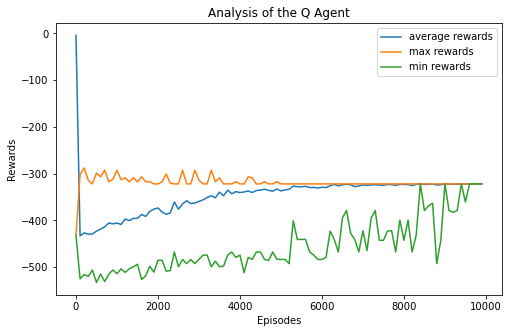

In [5]:
### We print the path, the reward in the last iteration and the maximum reward that the agent has seen in the entire training process. 
print(f"Optimal Path = ",end='')
print(*path)
print(f"Best Path = ",end='')
print(*best_path)
print(f'Reward for the last episode = {rewards}')
print(f'Max reward (in an episode) during training = {max(final_reward)}')
print(f'Difference in the path lengths of the best path and the optimal path {rewards-max(final_reward)}')

### We then plot the progress log of the agent to see how well it has learnt the environment. 
plot=plt.figure(figsize=(8,5))
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label="average rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label="max rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label="min rewards")
plt.title('Analysis of the Q Agent')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.legend()
plt.show();

Now we visualize the optimal path, the best path found by the agent while exploring. The x_val contains the city co-ordinated of the path variable and the best path variable, ie if path is 0->1->2->0 then x_val has x values of city 0 being connected to 1, 1 being connected to 2 and 2 being connected to 0. This can be seen for both optimal path and the best path.

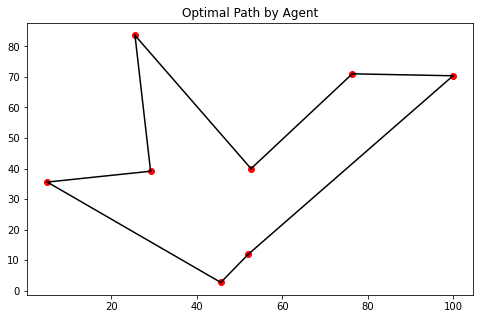

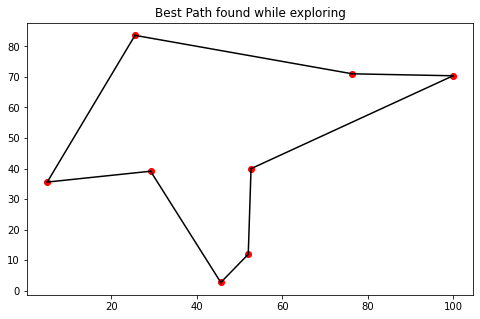

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

### Plotting the path that the agent has learnt. 
plt.figure(figsize=(8,5))
for i in range(size):
    plt.scatter(p[i][0],p[i][1],color='r')

for i in range(len(path)-1):
    x_val=[p[path[i]][0],p[path[i+1]][0]]
    y_val=[p[path[i]][1],p[path[i+1]][1]]
    plt.plot(x_val,y_val,'k')  
plt.title('Optimal Path by Agent')


### Plotting the best path found while exploring. 
plot=plt.figure(figsize=(8,5))
for i in range(size):
    plt.scatter(p[i][0],p[i][1],color='r')
for i in range(len(path)-1):
    x_val=[p[best_path[i]][0],p[best_path[i+1]][0]]
    y_val=[p[best_path[i]][1],p[best_path[i+1]][1]]
    plt.plot(x_val,y_val,'k')  
plt.title('Best Path found while exploring');

## 3. Implementation of RL model

Below is the entire implementation of RL which can be ran with the suitable size and hyperparameters. We have done it for size 8 with the set of cities. One can uncomment the cities and change the size variable to get the solution for that particular TSP.

In [2]:
### This is the environment that the agent would interact with. 
class Field_states:
    
    ### Class contructor. 
    def __init__(self,size,start_position,prev_city,locations,distances,visited):
        self.size=size ### Number of cities
        self.start_position=start_position ### Starting position for TSP
        self.prev_city=self.start_position ### The previous city visited
        self.locations=locations ### The co-ordinates of the cities
        self.distances=distances ### The distance matrix which has the co-ordinated of the cities. 
        self.visited=visited ### This is the log of the cities that are not visited. 

    ### The update function updates the visited log by poping the city that the agent is currently on. 
    def update(self,action):
        if len(self.visited)!=1:
            self.visited.pop(action)
            return False
        else:
            return True

    ### Function returns the reward of the current city visted from the previous to the agent while updating the previous city. 
    def make_action(self,action):
        reward=-self.distances[self.prev_city][self.visited[action]]
        self.prev_city=self.visited[action]
        return reward
    
    ### This function tells which city is being visited. 
    def get_action(self,action):
        return self.visited[action]
    
    ### Reset makes the visited log reset to its full capacity. 
    def reset(self):
        self.visited=[i for i in range(1,self.size)]

    ### This returns the number of states that the problem can have. 
    def get_number_of_states(self):
        return self.size*self.size

    ### This returns which is the previous city to the agent (number of action*number of cities). 
    def get_state(self):
        state = self.prev_city
        return state

    ### This returns the current city that is being visited. 
    def current_city(self,action):
        return self.visited[action]

    ### This makes the trip complete by rewarding the last city being visited to the starting point. 
    def final_trip(self,visited):
        return -self.distances[self.visited[0]][self.start_position]

100%|██████████| 10000/10000 [00:04<00:00, 2346.18it/s]


Optimal Path = 0 1 2 3 4 5 6 7 8 9 10 11 0
Best Path = 0 3 4 5 6 7 8 9 10 2 11 1 0
Reward for the last episode = -374.8354440691288
Max reward (in an episode) during training = -305.6565313174456
Difference in the path lengths of the best path and the optimal path 69.17891275168319


<Figure size 720x720 with 0 Axes>

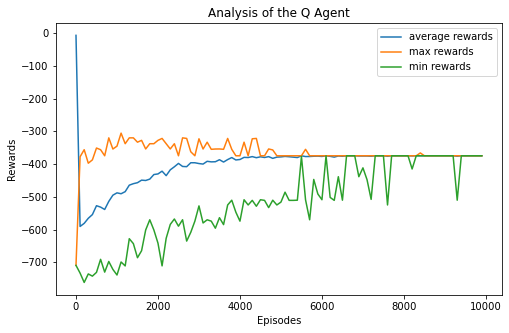

In [43]:
### tqdm is the library which is used for asthetic purposes which tells us the progress of the training loop and the number of 
### iterations per second. 

# size=5 ### Number of cities in the TSP
  
# p= np.random.rand(size,2)*100
# ### This are the values that are randomly generated by the command above and the model is hyperparameter tuned for this particular 
# ### set of co-ordinates. 

# ### Co-ordinated of the cities in the grid. 
# p=[[29.18398547, 39.11321842],
#  [25.53584877, 83.59069482],
#  [52.6727154 , 39.94974504],
#  [76.3494153 , 71.00058505],
#  [99.91002399, 70.35932207],
#  [52.01995294 ,11.92306692],
#  [45.60271258 , 2.70580149],
#  [ 5.01802982 ,35.56415151]]

# size=5
# p=[[44.9099297 , 71.60198543],
#  [99.6797983 , 97.75357024],
#  [94.89921275 ,81.95573837],
#  [87.96256798 ,52.08882539],
#  [60.75790857 ,70.30094274]]

# size=10
# p=[[45.48965134, 65.84756108], [70.2055523 , 89.02859327], [96.96846514, 7.38527303], [66.77938417, 12.5508675 ], [75.19659164, 37.13545284], [32.88640287, 7.92377867], [ 8.27123283, 35.67744457], [20.12852 , 80.93716743], [37.00990546, 96.84224497], [22.78619587, 14.13997714]]

size=12
p=[[85.09075165,  6.21524607],
[74.76018376, 10.1517191 ],
[46.52036972, 16.06151535],
[92.89370863, 19.04608841],
[92.19586991, 16.32482861],
[70.82967811, 34.22976003],
[96.50522388, 44.89770487],
[76.97332995, 55.57635978],
[83.95870587, 86.79955858],
[81.93288277, 97.74594552],
[51.51014041, 99.83739524],
[49.31326904,  1.82068674]]


### q stores the distance between each city in the grid.
q= cdist(p,p)

### Initial position, for the problem to be simple we always start from 0.
start_position=0

### Initializing path and rewards which will store the path and rewards that the agent emits in each training loop. 
path=[0]
rewards=0

### Setting the visited log to be all nodes not being visited except the starting position. 
visited=[i for i in range(1,size)]

### Calling the environment with the name field. 
field= Field_states(size,start_position,start_position,p,q,visited)

### Initializing the flag to be equal to false, which will tell us when the program ends. 
done=False

### Setting up the Q-table, which will be of the dimension (number of states * number of actions)

### The number of action = the number of cities that can be visited which is the total number of cities. 
number_of_actions=size

### The total number of states would be nothing but (number of action * number of cities). 
number_of_states = field.get_number_of_states()

### Initializing the Q-table to be 0
q_table = np.zeros((size,size))

### Here since we have the negative reward for every movement, we initialize the diagonals to be a high negative value
### so as to avoid picking the same state when we select the max of the Q-value for an action. 
for i in range(size):
    q_table[i][i]=-10**6

    
### Intitializing hyper parameters
epsilon = 1  ### Exploration values
epsilon_decay=0.9999 ### Exploration decay values. The exploration will reduce by the exploration rate in each training loop.
alpha = 0.8 ### This is the learning rate. 
gamma = 1 ### This is the discount factor. 

### Auxilary defination for the visualization purposes. 
final_reward=[] ### Has the rewards of all training loops.
mast_path=[] ### Has the best path so far. 
best_q_table_so_far=[] ### Has the best Q-table so far. 

### This is the dictionary used to log the progress of the agent. 
aggr_ep_rewards={'ep':[],'avg':[],'max':[],'min':[]}

plot=plt.figure(figsize=(10,10))

### Initializing the training loop.

### Here I use _ as my iterator, because it is rarely used as a variable, there are low chances of the iterator being overriden 
### by a value somewhere in the loop. 
best_path=[]
all_paths=[]
train_epoch=10000


for _ in tqdm(range(train_epoch)):
    
    ### Initialize the start_position, path, reward, visited log for the training loop. 
    start_position=0
    path=[0]
    rewards=0
    visited=[i for i in range(1,size)]
    
    ### Calling the environment. 
    field= Field_states(size,start_position,start_position,p,q,visited)
    
    done=False ### Initialized to False so as to enter the while loop
    flag=0 ### It is a helper flag to check for the maximum value from the city that has not been visited. 
    used=[i for i in range(size)] ### Checks if the city has been visited or not. 
    
    ### In the below while loop, the agent performs one experiment. This loop is terminated when the done variable is True. 
    while not done:
        ### Get the previously visited city. 
        state = field.get_state()
        
        ### Generate a random number uniformly and explore if the number is lesser than exploration value else exploit
        if random.uniform(0,1)< epsilon:
            ### Get the index of the visited log as the action, so the city being visited here is the city which has that index of 
            ### the visited log, visited = [1,2,3,4,5] action = 2, hence city being visited is visited[2] = 3. 
            action=random.randint(0,len(visited)-1)
        else:
            ### New array takes the Q-table with the state we are currently in and is used to get the action which is not visited and 
            ### has the maximum value in the state. 
            new_array=q_table[state,:]
            
            ### Flag is again used to enter the while loop which checks for whether the city has been visited or not.
            flag==1
            while flag==1:
                ### Gets the index of the maximum argument
                action=np.argmax(new_array[state])
                
                ### Checks whether that city is visited. 
                if action in visited:
                    flag=0
                    
                else:
                    flag=1
                    new_array=new_array[state].pop(action)
                    
        ### If the action is an invalid action due to the coding error we just continue (Safety purposes)
        if action > len(visited)-1:
            continue
            
        else:
            ### Append the path, reward, current city, and the terminal variable done. 
            path.append(field.current_city(action))
            reward= field.make_action(action)
            travel_to=field.get_action(action)
            rewards+=reward
            done = field.update(action)

            ### Update the Q-table here. 
            new_state = field.get_state()
            new_state_max=np.max(q_table[new_state])
            
            ### This is the bellman Equation that we use to get the value of a State,Action pair. 
            q_table[state,travel_to]=(1-alpha)*q_table[state,travel_to]+alpha*(reward+gamma*new_state_max)
      
            ### We decay the epsilon here at the end of the training loop. 
            epsilon*=epsilon_decay
            
    ### The path is again appended with 0 so as to complete the loop. 
    path.append(0)
    
    ### The reward is added to complete the trip. 
    reward= field.final_trip(action)
    rewards+=reward
    
    ### Updating the Q-table for the last step in completing the loop. 
    new_state = field.get_state()
    new_state_max=np.max(q_table[new_state])
    q_table[state,0]=(1-alpha)*q_table[state,0]+alpha*(reward+gamma*new_state_max)
    final_reward.append(rewards)
    all_paths.append(path)
    ### Here we log the progress of the agent. 
    if rewards==max(final_reward):
        best_q_table_so_far=q_table
        best_path=path
    if not _%100:
        average_reward = sum(final_reward[-100:])/100
        aggr_ep_rewards['ep'].append(_)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['max'].append(max(final_reward[-100:]))
        aggr_ep_rewards['min'].append(min(final_reward[-100:]))
    field.reset()

### We print the path, the reward in the last iteration and the maximum reward that the agent has seen in the entire training process. 
print(f"Optimal Path = ",end='')
print(*path)
print(f"Best Path = ",end='')
print(*best_path)
print(f'Reward for the last episode = {rewards}')
print(f'Max reward (in an episode) during training = {max(final_reward)}')
print(f'Difference in the path lengths of the best path and the optimal path {abs(rewards-max(final_reward))}')
### We then plot the progress log of the agent to see how well it has learnt the environment. 
plot=plt.figure(figsize=(8,5))
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label="average rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label="max rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label="min rewards")
plt.title('Analysis of the Q Agent')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.legend()
plt.show();
### 419,338,80

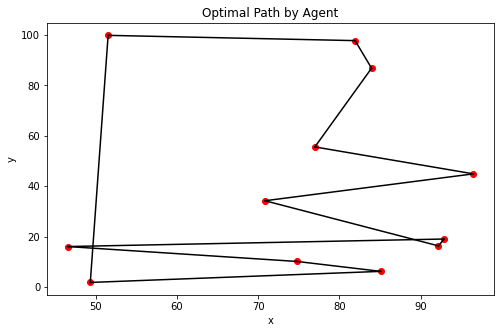

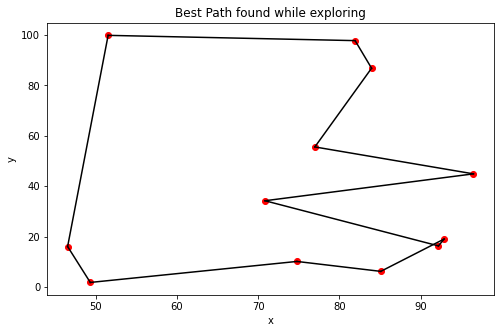

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

### Plotting the path that the agent has learnt. 
plt.figure(figsize=(8,5))
for i in range(size):
    plt.scatter(p[i][0],p[i][1],color='r')

for i in range(len(path)-1):
    x_val=[p[path[i]][0],p[path[i+1]][0]]
    y_val=[p[path[i]][1],p[path[i+1]][1]]
    plt.plot(x_val,y_val,'k')  
plt.xlabel('x')
plt.ylabel('y')
plt.title('Optimal Path by Agent');

### Plotting the best path found while exploring. 
plot=plt.figure(figsize=(8,5))
for i in range(size):
    plt.scatter(p[i][0],p[i][1],color='r')
for i in range(len(path)-1):
    x_val=[p[best_path[i]][0],p[best_path[i+1]][0]]
    y_val=[p[best_path[i]][1],p[best_path[i+1]][1]]
    plt.plot(x_val,y_val,'k')  
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Path found while exploring');

The below block of code is used to make a mp4 file for the progress of the path and the agent. I am not aware how to run this on jupyter hub, but I this code works on the local machine as we need to use the paths that are to be provided for storing and accessing the files stored. So I have not ran the code blocks but instead I have provided the mp4 file that I received after running them locally. 

So lets start with the path. We iterate over paths at interval of 10 and plot them in the same manner as we did above. We then save this files to a folder. 

In [454]:
print("Started saving the paths as images")
for i in range(0,len(all_paths),10):
    plt.figure(figsize=(9,6))
    for j in range(len(all_paths[i])-1):
        plt.scatter(p[j][0],p[j][1],color='r')
        x_val=[p[all_paths[i][j]][0],p[all_paths[i][j+1]][0]]
        y_val=[p[all_paths[i][j]][1],p[all_paths[i][j+1]][1]]
        plt.plot(x_val,y_val,'k')  
    plt.xlabel('x', fontsize = 14)
    plt.ylabel('y', fontsize = 14)
    plt.title(f'Optimal Path Found till iteration={i}',
              fontsize=14)
    plt.savefig(f'./Optimal_Path/Size_8/img_{i}.png', 
                transparent = False,  
                facecolor = 'white'
               )
    plt.close()
print("Saved all the images")

Started saving the paths as images
Saved all the images


In [45]:
print("Started saving the progress of Agent as images")
for i in range(0,len(aggr_ep_rewards['ep'])):
    plt.figure(figsize=(9,6))
    plt.plot(aggr_ep_rewards['ep'][:i], aggr_ep_rewards['avg'][:i], label="average rewards")
    plt.plot(aggr_ep_rewards['ep'][:i], aggr_ep_rewards['max'][:i], label="max rewards")
    plt.plot(aggr_ep_rewards['ep'][:i], aggr_ep_rewards['min'][:i], label="min rewards")
    plt.xlabel('Episodes', fontsize = 14)
    plt.ylabel('Rewards', fontsize = 14)
    plt.title(f'Agent Progress iteration={i*100}',
              fontsize=14)
    plt.savefig(f'./Agent/Size_12/img_{i*100}.png', 
                transparent = False,  
                facecolor = 'white'
               )
    plt.close()
print("Saved all the Progress")

Started saving the progress of Agent as images
Saved all the Progress


Below set of code is the one which access the images from the directory where the images are stored and then it writes it as the mp4 file. Thus we can see the evolution of the path and the progress the agent has made via the video it outputs into a certain directory.

In [447]:
import imageio
import os

files=os.listdir("Optimal_Path/Size_")
image_path=[os.path.join("Optimal_Path/Size_8",file) for file in files]

images=[]
for img in image_path:
    images.append(imageio.imread(img))
imageio.mimwrite("GIFs/Path_Progress_size_8.mp4",images,fps=15)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (648, 432) to (656, 432) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


In [46]:
import imageio
import os

files=os.listdir("Agent/Size_12")
image_path=[os.path.join("Agent/Size_12",file) for file in files]

images=[]
for img in image_path:
    images.append(imageio.imread(img))
imageio.mimwrite("GIFs/Agent_Progress_size_12.mp4",images,fps=10)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (648, 432) to (656, 432) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
